For the below cell, I'll let $a = /$, $b = \backslash$, and $c = |$. 

In [1]:
import numpy as np

def make_vertices(a, b, c):
    factor = sqrt(3)/2
#    factor = 0.866025403784
        
    height = 2*c + a + b
    width = int(1.5*(a + b)+1)
    
    vertex_list = []
    for i in range(-width, width):
        for j in range(-height, height):
            # shifts every other row left by 1.5
            if j % 2 == 1:
                if i % 3 != 2:
                    vertex_list.append((i - 3/2, j * factor))
            # non-shifted rows        
            elif i % 3 != 2:
                vertex_list.append((i, j * factor))
               
    trimmed_list = []
    for vertex in vertex_list:
        if (vertex[1] <= factor * (1/1.5*vertex[0] + 2*c) and # this one controls the height on the left
            vertex[1] <= factor * (-1/1.5*vertex[0] + 2*c + 2*(a - 1) + 1) and
            vertex[0] >= -0.5 and 
            vertex[0] <= (a + b - 1)*1.5 and 
            vertex[1] >= factor * (-1/1.5*vertex[0]) and 
            vertex[1] >= factor * (1/1.5*vertex[0] + 1/3 - (2*b-1))
           ):
            trimmed_list.append(vertex)
    return trimmed_list

#print(sqrt(3)/2)
#print(make_vertices(12,2,5))

In [2]:
my_vertices = make_vertices(4,3,2)

vertex_positions = {}
for vertex in my_vertices:
    vertex_positions[vertex] = list(vertex)

my_edges = {}
adj_mat = np.zeros([len(my_vertices), len(my_vertices)])
for i in range(len(my_vertices)):
    for j in range(len(my_vertices)):
        distance = (my_vertices[i][0] - my_vertices[j][0])^2 + (my_vertices[i][1] - my_vertices[j][1])^2
        if distance == 1:
            adj_mat[i][j] = 1
            if my_vertices[i] not in my_edges:
                my_edges[my_vertices[i]] = [my_vertices[j]]
            else:
                my_edges[my_vertices[i]].append(my_vertices[j])

edge_graph = Graph(my_edges)
#edge_graph.show()
#print(edge_graph)
positioned_graph = edge_graph.graphplot(pos = vertex_positions, vertex_labels = False, vertex_size = 0)
#positioned_graph.show()

In [3]:
def draw_honeycomb(a, b, c, colors = 0, bipartite = False):
    my_vertices = make_vertices(a, b, c)

    vertex_positions = {}
    for vertex in my_vertices:
        vertex_positions[vertex] = list(vertex)

    my_edges = {}
    adj_mat = np.zeros([len(my_vertices), len(my_vertices)])
    for i in range(len(my_vertices)):
        for j in range(len(my_vertices)):
            distance = (my_vertices[i][0] - my_vertices[j][0])^2 + (my_vertices[i][1] - my_vertices[j][1])^2
            if distance == 1:
                adj_mat[i][j] += 1
                if my_vertices[j] in my_edges:
                    if my_vertices[i] not in my_edges[my_vertices[j]]:
                        if my_vertices[i] not in my_edges:
                            my_edges[my_vertices[i]] = [my_vertices[j]]
                        else:
                            my_edges[my_vertices[i]].append(my_vertices[j])
                else: 
                    if my_vertices[i] not in my_edges:
                        my_edges[my_vertices[i]] = [my_vertices[j]]
                    else:
                        my_edges[my_vertices[i]].append(my_vertices[j])

    # draws bipartite coloring if true, returns vertices of zero size if not
    if bipartite == True:
        edge_graph = BipartiteGraph(my_edges)
        vertex_colors = []
        for i in my_vertices:
            if i in edge_graph.left:
                vertex_colors.append('#aaffcc')
            else:
                vertex_colors.append('#aaaaff')
                
        positioned_graph = edge_graph.graphplot(pos = vertex_positions, vertex_labels = False, vertex_size = 50, vertex_colors = vertex_colors)
    elif bipartite == False:
        edge_graph = Graph(my_edges)
        positioned_graph = edge_graph.graphplot(pos = vertex_positions, vertex_labels = False, vertex_size = 0)
        
    if colors == rainbow:
        color_list = rainbow(len(edge_graph.edges()))
        edge_colors = {}
        colored_list = []
        i = 0
        for tup in edge_graph.edges():
            if tup in colored_list:
                break
            new_color = np.random.choice(color_list)
            new_color = color_list[i]
            if new_color not in edge_colors:
                edge_colors[new_color] = [tup]
                colored_list.append(tup)
            elif tup not in edge_colors[new_color]:
                edge_colors[new_color].append(tup)
                colored_list.append(tup)
            i += 1
        positioned_graph = edge_graph.graphplot(pos = vertex_positions, vertex_labels = False, vertex_size = 50, edge_colors = edge_colors)
    
    if bipartite == True and colors == rainbow:
        positioned_graph = edge_graph.graphplot(pos = vertex_positions, vertex_labels = False, vertex_size = 50, vertex_colors = vertex_colors, edge_colors = edge_colors)
    
    # T put all these return things here, don't know if I need them all
    return_dict = {"graph" : positioned_graph,
                   "adj_mat" : adj_mat,
                   "vertices" : my_vertices,
                   "edge_graph" : edge_graph,
                   "vertex_positions" : vertex_positions,
                   "edges" : my_edges}
    return return_dict

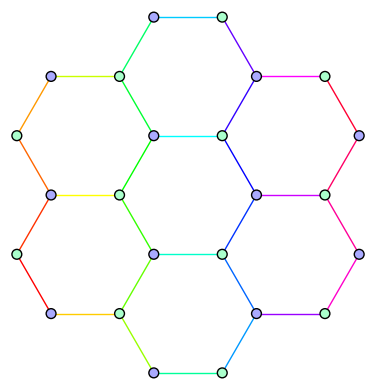

[[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.

In [4]:
my_graph = draw_honeycomb(2,2,2, colors = rainbow, bipartite = True)
my_graph["graph"].show()
adjacency = my_graph["adj_mat"]
print(adjacency)

In [5]:
# this function takes an input of a graph (expecting all of the outputs given by draw_honeycomb), and a pair of vertices
# then it checks whether those vertices are adjacent, and if they are it combines the two vertices into one node
def graph_smoosh(graph, v1, v2):
    positioned_graph = graph["graph"]
    adj_mat = graph["adj_mat"]
    vertices = graph["vertices"]
    edge_graph = graph["edge_graph"]
    edges = graph["edges"]
    positions = graph["vertex_positions"]
    
    
    # v1 and v2 are likely to be entered as numbered-vertices like 2 or 16, 
        # so check for that first and call the relvant tuple values
    if type(v1) != tuple:
        v1 = vertices[v1]
    if type(v2) != tuple:
        v2 = vertices[v2]
    
    #check to see if the vertices are adjacent and give an error if not
    adjacent_check = 0
    if v1 in edges:
        if v2 in edges[v1]:
            adjacent_check = 12
    if v2 in edges:
        if v1 in edges[v2]:
            adjacent_check = 21
    if adjacent_check == 0:
        print("The entered vertices are not adjacent")
        return False
    
    #the new position is the average of the positions of v1 and v2
    # I changed new_position to a tuple instead of a list -- T on 2/8
    new_position = ((positions[v1][0] + positions[v2][0])/2, (positions[v1][1] + positions[v2][1])/2)
    
    vertices.remove(v1)
    vertices.remove(v2)
    vertices.append(new_position)
    
    positions.pop(v1)
    positions.pop(v2)
    positions[tuple(new_position)] = new_position    
        
    new_edges = []
    
    # checks for edges going TO v1 and v2 and puts them in the list of new edges
    keys_to_delete = []
    for vertex_key in edges:
        if v1 in edges[vertex_key] and vertex_key != v2:
            new_edges.append(vertex_key)
            edges[vertex_key].remove(v1)
            
            # checks if there are no edges left for that vertex
            if len(edges[vertex_key]) == 0:
                keys_to_delete.append(vertex_key)
            
        if v2 in edges[vertex_key] and vertex_key != v1:
            new_edges.append(vertex_key)
            edges[vertex_key].remove(v2)
            
            # checks if there are no edges left for that vertex
            if len(edges[vertex_key]) == 0:
                keys_to_delete.append(vertex_key)
                
    for vertex in keys_to_delete:
        edges.pop(vertex)
    
    # checks for edges coming FROM v1 and v2 and puts them in the list of new edges
    # then removes the old v1 and v2 from the dictionary of edges
    if v1 in edges:
        for i in edges[v1]:
            if i not in new_edges and i != v2:
                new_edges.append(i)
        edges.pop(v1)
    if v2 in edges:
        for i in edges[v2]:
            if i not in new_edges and i != v1:
                new_edges.append(i)
        edges.pop(v2)
        
    # add the position of the new vertex to the edge set as a key, with entry of all edges coming from it
    edges[tuple(new_position)] = new_edges
    

    edge_smoosh_graph = Graph(edges)    
    positioned_smoosh_graph = edge_smoosh_graph.graphplot(pos = positions, vertex_labels = False, vertex_size = 0)
    
    return_dict = {"graph" : positioned_smoosh_graph,
                   "adj_mat" : adj_mat,
                   "vertices" : vertices,
                   "edge_graph" : edge_graph,
                   "vertex_positions" : positions,
                   "edges" : edges}
    return return_dict

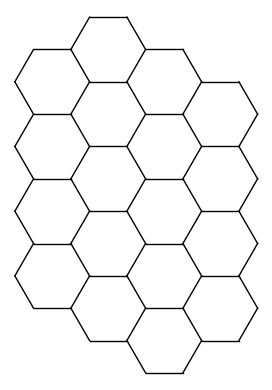

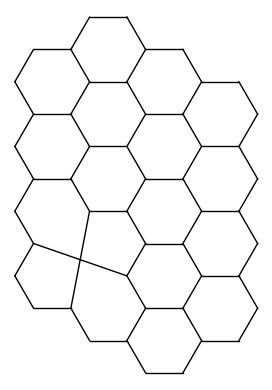

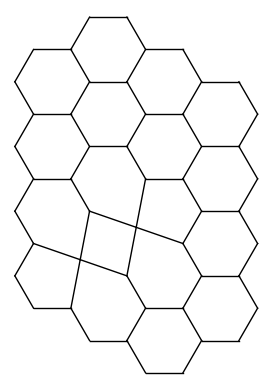

In [6]:
test = draw_honeycomb(2,3,4)
test["graph"].show()

#graph_smoosh(test, (3/2, sqrt(3)/2), (5/2, sqrt(3)/2)).show()
test2 = graph_smoosh(test, (3/2, sqrt(3)/2), (1, sqrt(3)))
test2["graph"].show()

test3 = graph_smoosh(test2, (3, sqrt(3)), (5/2, 3*sqrt(3)/2))
test3["graph"].show()

In [7]:
# makes the same kind of dictionay as my_edges above but has every vertex as a key
def include_all_edges(vertices): # T needs to change this later to work with the other one -- 2/14/22
    edges = {}
    for i in range(len(vertices)):
        for j in range(len(vertices)):
            distance = (vertices[i][0] - vertices[j][0])^2 + (vertices[i][1] - vertices[j][1])^2
            if distance == 1: # if vertices[i] and vertices[j] are connected in hexagon graph
                if vertices[i] in edges: # if that key is already in there
                    edges[vertices[i]].append(vertices[j]) # add the new vertex to it
                else:
                    if vertices[i] not in edges: # if that key is not there yet
                        edges[vertices[i]] = [vertices[j]]
    return edges


# send it a list of your blue vertices and green vertices and dictionary of all connections my_edges
def adjacency_mat(blue_vertices, green_vertices, edges):
    adj = np.zeros((len(blue_vertices), len(green_vertices))) # blue for row labels and green for column labels    
    for i,blue_vertex in enumerate(blue_vertices): # i = rows = blue vertices
        for j, green_vertex in enumerate(green_vertices): #j = rows = green vertices
            if green_vertex in edges[blue_vertex]:
                adj[i][j] = 1                
    return adj

# Do pivot operation M-VW
def do_pivot_op(A, blue_list, green_list):
    # send an np array M that is suitable for pivot operation
    # M is nxn matrix
    n = len(A)
    if A[n-1][n-1] != 1:
        return 'cannot do pivot op, entry not 1',0,0
    M = A.copy()
    v = M[:,n-1] #last column of M
    w = M[n-1,:] #last row of M
    for i in range(n):
        for j in range(n):
            M[i][j] = M[i][j]-v[i]*w[j]
            
    M_new = np.zeros((n-1,n-1))
    for i in range(n-1):
        for j in range(n-1):
            M_new[i][j] = M[i][j] 
            
    blue_list = blue_list[:-1] # delete the last thing in blue_list
    green_list = green_list[:-1] # delete the last thing in green_list
    return M_new, blue_list, green_list


# send your matrix A, A[n][m] is the entry you want to pivot at
# so the edge between blue vertex number n, and green vertex number m
def to_pivot(A,n,m,blue_list,green_list):
    # n = row corresponding to blue vertex
    # m = column corresponding to green vertex
    # want to put (n,m) in last spot of matrix so we can do the pivot operation -- I don't think we actually need to do this
    num_cols = len(A[0])
    num_rows = len(A[:,0])
    #print('original A = \n',A)
    if n > num_rows or m > num_cols:
        return 'nope'
    A[[num_rows-1,n]] = A[[n,num_rows-1]] # swap rows 
    #print('swapped rows \n',A)
    B = A.transpose()
    #print('original B = \n',B)
    B[[num_cols-1,m]] = B[[m,num_cols-1]] # swap columns
    #print('swapped columns \n',B)
    C = B.transpose()   
    
    # I'm switching rows n and the last row, so do that in blue_list also
    temp1 = blue_list[n]
    temp2 = blue_list[num_rows-1]
    blue_list[num_rows-1] = temp1
    blue_list[n] = temp2
    # I'm switching columns m and the last column, so do that in green_list also
    temp3 = green_list[m]
    temp4 = green_list[num_cols-1]
    green_list[num_cols-1] = temp3
    green_list[m] = temp4
    
    # when we collapse two vertices, we delete them from the matrix -- so we don't really care about them as far as the matrix goes
    
    return C, blue_list, green_list

# this makes lists and dictionaries of the blue and green vertices in the bipartite graph
def blue_green_lists(edge_graph):
    blue_vertices = list(edge_graph.right)
    green_vertices = list(edge_graph.left)
    green_vertices.sort()
    blue_vertices.sort()
    blue = {}
    green = {}
    
    # the blue and green dictionaries get created in the order that the lists blue_vertices and green_vertices are given

    # make dictionary for blue vertices
    for i, vertex in enumerate(blue_vertices):
        blue[i] = vertex

    # make dictionary for green vertices
    for i, vertex in enumerate(green_vertices):
        green[i] = vertex
        
    # I think we do not need the blue and green dictionaries, probably delete them     
    return blue_vertices, green_vertices

In [8]:
def matrix_smoosh(M, v1, v2, blue_list, green_list):
    # M the adjacency (or whatever) matrix
    # v1 and v2 the vertices between the edge you want to smoosh
    # v1 = row
    # v2 = column
    M2, blue_list, green_list = to_pivot(M,v1,v2, blue_list, green_list) # here v1 and v2 need to be the row and column number where v1 and v2 are in the matrix
    if M2 == 'cannot do pivot op, entry not 1':
        return M2, blue_list, green_list
    M3, blue_list, green_list = do_pivot_op(M2, blue_list, green_list)
    return_dict = {"matrix": M3,
                  "blue_list": blue_list,
                  "green_list": green_list}
    return return_dict


def smoosh1(graph, v1, v2):
    positioned_graph = graph["graph"]
    adj_mat = graph["adj_mat"]
    vertices = graph["vertices"]
    edge_graph = graph["edge_graph"]
    edges = graph["edges"]
    positions = graph["vertex_positions"]
    
    all_edges = include_all_edges(vertices) # we probably don't really need this
    blue_list, green_list = blue_green_lists(edge_graph) # this is way more complicated than it needs to be
    adj_mat_block = adjacency_mat(blue_list, green_list, all_edges) # this puts just blue vertices for rows and green vertices for columns

    # need to make sure we're sending matrix_smoosh the vertices in the order blue=row, green=column
    if v1 in blue_list:
        blue_num = blue_list.index(v1)
        green_num = green_list.index(v2)
    elif v1 in green_list:
        green_num = green_list.index(v1)
        blue_num = blue_list.index(v2)
        
    return_dict = {'graph_dict': graph_smoosh(graph, v1, v2),
                  'matrix_dict': matrix_smoosh(adj_mat_block, blue_num, green_num, blue_list, green_list)}
    
    return return_dict


def smoosh2(graph, v1, v2, M, blue_list, green_list):
    positioned_graph = graph["graph"]
    adj_mat = graph["adj_mat"]
    vertices = graph["vertices"]
    edge_graph = graph["edge_graph"]
    edges = graph["edges"]
    positions = graph["vertex_positions"]
    
    adj_mat_block = M
    
    # need to make sure we're sending matrix_smoosh the vertices in the order blue=row, green=column
    if v1 in blue_list:
        blue_num = blue_list.index(v1)
        green_num = green_list.index(v2)
    elif v1 in green_list:
        green_num = green_list.index(v1)
        blue_num = blue_list.index(v2)
        
    return_dict = {'graph_dict': graph_smoosh(graph, v1, v2),
                  'matrix_dict': matrix_smoosh(adj_mat_block, blue_num, green_num, blue_list, green_list)}
    
    
    return return_dict

/tmp/ipykernel_564314/292266868.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if M2 == 'cannot do pivot op, entry not 1':


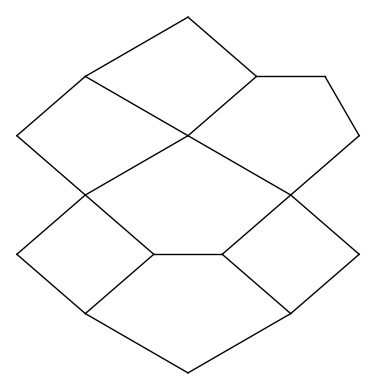

[[ 1.  3.  1.  0.]
 [-2. -1.  0.  1.]
 [-2. -2.  0. -2.]
 [-1. -2.  1. -1.]]


In [107]:
graph = draw_honeycomb(2,2,2,bipartite=True)

def random_edge(graph):
    random_vertex_number = np.random.choice(range(len((graph["edges"]))))
    chosen_vertex = list(graph["edges"])[random_vertex_number]
    random_neighbor_number = np.random.choice(range(len(graph["edges"][chosen_vertex])))
    chosen_neighbor = graph["edges"][chosen_vertex][random_neighbor_number]
    return chosen_vertex, chosen_neighbor

def random_horiz_edge(graph):
    random_vertex_number = np.random.choice(range(len((graph["edges"]))))
    chosen_vertex = list(graph["edges"])[random_vertex_number]
    random_neighbor_number = np.random.choice(range(len(graph["edges"][chosen_vertex])))
    chosen_neighbor = graph["edges"][chosen_vertex][random_neighbor_number]
    while chosen_vertex[1] != chosen_neighbor[1]:
        random_vertex_number = np.random.choice(range(len((graph["edges"]))))
        chosen_vertex = list(graph["edges"])[random_vertex_number]
        random_neighbor_number = np.random.choice(range(len(graph["edges"][chosen_vertex])))
        chosen_neighbor = graph["edges"][chosen_vertex][random_neighbor_number]
    return chosen_vertex, chosen_neighbor
    
def generate_example(graph, num_smooshes):
    new_edge = random_horiz_edge(graph)
    first_result = smoosh1(graph, new_edge[0], new_edge[1])
    
    if num_smooshes == 1:
        return first_result
    else:
        next_result = first_result.copy()
        for i in range(num_smooshes - 1):
            new_edge = random_horiz_edge(graph)
            collapsed_matrix = next_result['matrix_dict']['matrix']
            blue_list = next_result['matrix_dict']['blue_list']
            green_list = next_result['matrix_dict']['green_list']
            next_result = smoosh2(first_result['graph_dict'], new_edge[0], new_edge[1], collapsed_matrix, blue_list, green_list)
            
        return(next_result)
        


random_test = generate_example(graph, 8)
random_test["graph_dict"]["graph"].show()
print(random_test["matrix_dict"]['matrix'])
# BUG: if you enter a number of edges more than there are edges it hangs forever. So don't do that. 

/tmp/ipykernel_564314/292266868.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if M2 == 'cannot do pivot op, entry not 1':


((1, sqrt(3)), (3/2, 1/2*sqrt(3)))


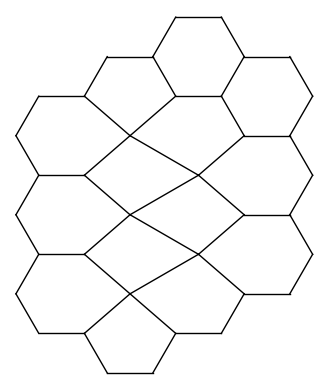

[[ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  2.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1. -1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1. 

In [56]:

graph = draw_honeycomb(3,2,3, bipartite = True)
# draw honeycomb outputs positioned_graph, adj_mat, my_vertices, edge_graph, vertex_positions, my_edges
#print(graph)
# first collapse
smooshed = smoosh1(graph,(3/2,sqrt(3)/2), (5/2,sqrt(3)/2))
collapsed_matrix = smooshed["matrix_dict"]['matrix']
blue_list = smooshed['matrix_dict']['blue_list']
green_list = smooshed['matrix_dict']['green_list']
positioned_graph2 = smooshed['graph_dict']["graph"]
#positioned_graph2.show()
#print(collapsed_matrix)

# second collapse
smooshed2 = smoosh2(smooshed['graph_dict'],(3/2,3*sqrt(3)/2), (5/2,3*sqrt(3)/2), collapsed_matrix, blue_list, green_list)
collapsed_matrix = smooshed2['matrix_dict']['matrix']
blue_list = smooshed2['matrix_dict']['blue_list']
green_list = smooshed2['matrix_dict']['green_list']
positioned_graph3 = smooshed2['graph_dict']["graph"]
#positioned_graph3.show()
#print(collapsed_matrix)

# third collapse
smooshed3 = smoosh2(smooshed['graph_dict'],(6/2,2*sqrt(3)/2), (8/2,2*sqrt(3)/2), collapsed_matrix, blue_list, green_list)
collapsed_matrix = smooshed3['matrix_dict']['matrix']
blue_list = smooshed3['matrix_dict']['blue_list']
green_list = smooshed3['matrix_dict']['green_list']
positioned_graph4 = smooshed3['graph_dict']["graph"]
#positioned_graph4.show()
#print(collapsed_matrix)

# fourth collapse
smooshed4 = smoosh2(smooshed['graph_dict'],(6/2,4*sqrt(3)/2), (8/2,4*sqrt(3)/2), collapsed_matrix, blue_list, green_list)
collapsed_matrix = smooshed4['matrix_dict']['matrix']
blue_list = smooshed4['matrix_dict']['blue_list']
green_list = smooshed4['matrix_dict']['green_list']
positioned_graph5 = smooshed4['graph_dict']["graph"]
#positioned_graph5.show()
#print(collapsed_matrix)

# third collapse
smooshed5 = smoosh2(smooshed['graph_dict'],(3/2,5*sqrt(3)/2), (5/2,5*sqrt(3)/2), collapsed_matrix, blue_list, green_list)
collapsed_matrix = smooshed5['matrix_dict']['matrix']
blue_list = smooshed5['matrix_dict']['blue_list']
green_list = smooshed5['matrix_dict']['green_list']
positioned_graph6 = smooshed5['graph_dict']["graph"]
positioned_graph6.show()
print(collapsed_matrix)

In the matrix above, we have negatives on the entries that are offset from the others. So we found the GV part to get graph 
```
 2\/ 1
4\/\ 2
5/\/ 3
 \/\
1/\/ 4
 3/\
```

so the 2 and 3 are the ones with negative entries and those are the ones with the offset
GV part 
```
1| 0  1 2 1
2| -1 -1 0 0
3| 0 0 -1 -1
4| 1 2 1 0
5| 1 3 3 1
```

/tmp/ipykernel_564314/292266868.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if M2 == 'cannot do pivot op, entry not 1':


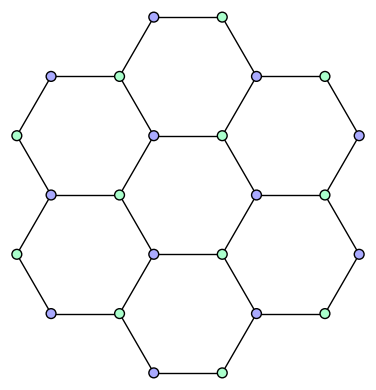

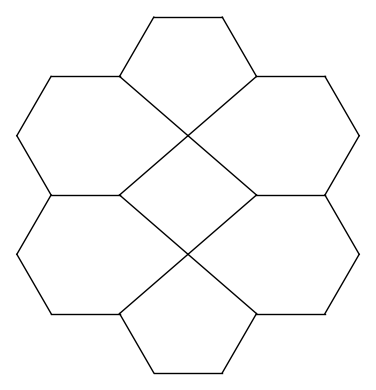

rows are vertices 
 [(0, 2*sqrt(3)), (3/2, -1/2*sqrt(3)), (9/2, 3/2*sqrt(3))]

columns are vertices 
 [(4, sqrt(3)), (5/2, 5/2*sqrt(3)), (4, 0)]

[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]


In [10]:
# T did this on 2/1/22 -- I want to test some graphs and think about the organization of the matrix
# I guess it would be nice to:
# tell it what the subgraph is, and what the matching is? Or maybe just easier to tell it which edges to collapse
# have it do all the collapses, and then do we want the GV matrix in the lower right hand corner?

graph = draw_honeycomb(2,2,2,bipartite=True)
positioned_graph1 = graph["graph"] # show the picture of the graph
vertices = graph["vertices"] # list of vertices by their coordinates
edge_graph = graph["edge_graph"] # I forget what this does
vertex_positions = graph["vertex_positions"] # this is a dictionary with keys (i,j) and entries [i,j]
my_edges = graph["edges"] # this is a dictionary with keys (i,j), and entries [k,l] the things (i,j) are connected to
all_edges = include_all_edges(vertices)

#positioned_graph1.show()


# make the subgraph -- manually
# in this case all the vertices of H are boundary vertices
H_vertices_blue = [(3/2,sqrt(3)/2), (3/2, 3*sqrt(3)/2), (3,sqrt(3))] # blue boundary vertices
H_vertices_green = [(1,sqrt(3)), (5/2,sqrt(3)/2), (5/2, 3*sqrt(3)/2)] # green boundary vertices
H_vertices = H_vertices_blue + H_vertices_green # all vertices
H_all_edges = include_all_edges(H_vertices_blue + H_vertices_green) # all edges of H
H_edges_to_collapse = [((3/2,sqrt(3)/2), (5/2,sqrt(3)/2)), ((3/2,3*sqrt(3)/2), (5/2,3*sqrt(3)/2))] # edges we want to collapse
H_vertices_to_collapse = [(3/2,sqrt(3)/2), (5/2,sqrt(3)/2), (3/2,3*sqrt(3)/2), (5/2,3*sqrt(3)/2)] # vertices that will get collapsed
H_nodes_blue = [] # the blue boundary vertices which do not get collapsed -- become GV nodes
for vertex in H_vertices_blue: 
    if vertex not in H_vertices_to_collapse:
        H_nodes_blue.append(vertex)
H_nodes_green = [] # the green boundary vertices which do not get collapsed -- become GV nodes
for vertex in H_vertices_green:
    if vertex not in H_vertices_to_collapse:
        H_nodes_green.append(vertex)
        
#print('blue nodes (not collapsed) \n', H_nodes_blue)
#print()
#print('green nodes (not collapsed) \n', H_nodes_green)
#print()


H_neighbors_of_blue = []
# find neighbors of blue vertices that get collapsed (so they'll be green actually)
for vertex in H_vertices_blue: # blue boundary vertices of H
    if vertex in H_vertices_to_collapse: # if it is a vertex that collapses
        # want to add the neighbors outside of H of vertex to H_nodes_blue
        for neighbor in all_edges[vertex]: # go through the neighbors of that vertex that gets collapsed
            if neighbor not in H_vertices: # if we have a neighbor in G-H
                H_neighbors_of_blue.append(neighbor) # this vertex is going to be one of the nodes

H_neighbors_of_green = []
# find neighbors of green vertices that get collapsed (so they'll be blue actually)             
for vertex in H_vertices_green:
    if vertex in H_vertices_to_collapse:
        # want to add the neighbors outside of H of vertex to H_nodes_green
        for neighbor in all_edges[vertex]:
            if neighbor not in H_vertices:
                H_neighbors_of_green.append(neighbor)
                
                
H_nodes_blue += H_neighbors_of_green
H_nodes_green += H_neighbors_of_blue

#print('blue nodes for GV matrix \n', H_nodes_blue)
#print()
#print('green nodes for GV matrix \n', H_nodes_green)
#print()

# find where the vertices in H_nodes_blue and H_nodes_green are in the KGV matrix
                
# in our final matrix, called KGV_matrix below
# we want H_nodes_blue at the bottom of the rows, and H_nodes_green on the far right for the columns
# how do we do this in a not stupid way?? 

# Find which rows are H_nodes_green, which columns are H_nodes_blue
                
# first collapse
smooshed = smoosh1(graph,(3/2,sqrt(3)/2), (5/2,sqrt(3)/2))
collapsed_matrix = smooshed["matrix_dict"]["matrix"]
blue_list = smooshed["matrix_dict"]["blue_list"]
green_list = smooshed["matrix_dict"]["green_list"]
positioned_graph2 = smooshed["graph_dict"]["graph"]
#positioned_graph2.show()
#print(collapsed_matrix)

# second collapse
smooshed2 = smoosh2(smooshed["graph_dict"],(3/2,3*sqrt(3)/2), (5/2,3*sqrt(3)/2), collapsed_matrix, blue_list, green_list)
collapsed_matrix = smooshed2["matrix_dict"]["matrix"]
blue_list = smooshed2["matrix_dict"]["blue_list"]
green_list = smooshed2["matrix_dict"]["green_list"]
positioned_graph3 = smooshed2["graph_dict"]["graph"]
#positioned_graph3.show()
#print(collapsed_matrix)
print()

KGV_matrix = collapsed_matrix
# this matrix is indexed by blue_list and green_list
#print('these give the rows of the matrix \n', blue_list)
#print()
#print('these give the columns of the matrix \n', green_list)
#print()
#print('blue nodes for GV matrix \n', H_nodes_blue)
#print()
#print('green nodes for GV matrix \n', H_nodes_green)
#print()

# blue and green are mixed up -- used stupid if else statements for a quick fix
if H_nodes_green[0] in green_list:
    column_indices_for_GV = [green_list.index(vertex) for vertex in H_nodes_green]
    row_indices_for_GV = [blue_list.index(vertex) for vertex in H_nodes_blue]
else:
    column_indices_for_GV = [green_list.index(vertex) for vertex in H_nodes_blue]
    row_indices_for_GV = [blue_list.index(vertex) for vertex in H_nodes_green]
    

KGV_new = KGV_matrix
KGV_new[[2,7]] = KGV_new[[7,2]]
KGV_new[[3,8]] = KGV_new[[8,3]]
KGV_new[[4,9]] = KGV_new[[9,4]]

# I'm switching rows 2 and the 7, so do that in blue_list also
temp1 = blue_list[2]
temp2 = blue_list[7]
blue_list[7] = temp1
blue_list[2] = temp2

# I'm switching rows 3 and the 8, so do that in blue_list also
temp1 = blue_list[3]
temp2 = blue_list[8]
blue_list[8] = temp1
blue_list[3] = temp2

# I'm switching rows 4 and the 9, so do that in blue_list also
temp1 = blue_list[4]
temp2 = blue_list[9]
blue_list[9] = temp1
blue_list[4] = temp2

positioned_graph1.show()
positioned_graph3.show()
print('rows are vertices \n', blue_list[7:])
print()
print('columns are vertices \n', green_list[7:])
print()
print(KGV_new[7:,7:])

In [11]:
# this function is supposed to assign a KGV matrix to a graph G
# right now it only works if you have only done one collapse from the original graph
# and you need to know which two vertices of the original graph were smooshed, which I don't know if we wanted to just know from the vertex that was the result of the collapsing
def graph_to_KGV(graph, vertices_that_got_smooshed, blue_list, green_list):
    # graph as is
    # vertices_that_got_smooshed is the two vertices that were collapsed to get G
    
    mat = np.zeros((len(blue_list), len(green_list)))
    
    positioned_graph = graph["graph"] # show the picture of the graph
    vertices = graph["vertices"] # list of vertices by their coordinates
    edge_graph = graph["edge_graph"] # I forget what this does
    vertex_positions = graph["vertex_positions"] # this is a dictionary with keys (i,j) and entries [i,j]
    my_edges = graph["edges"] # this is a dictionary with keys (i,j), and entries [k,l] the things (i,j) are connected to
    
    # Create all_edges list because the include_all_edges function only works for original hexagon graph:
    # (because it looks at the distance between vertices to assign where edges go which doesn't work for the collapsed graph)
    all_edges = {}
    list_of_key = list(my_edges.keys())
    list_of_value = list(my_edges.values())
    for v in vertices:
        if v in list_of_key:
            all_edges[v] = my_edges[v] # vertices that are already keys in my_edges dictionary
        else: # vertices that are entered as values, not keys in my_edges dictionary
            for values in list_of_value: # go through the lists that are values of my_edges dictionary
                if v in values: # find v in there
                    position = list_of_value.index(values) # find corresponding key to v
                    all_edges[v] = list_of_key[position]

            
    v1 = vertices_that_got_smooshed[0]
    v2 = vertices_that_got_smooshed[1]
    collapsed_vertex = ((v1[0]+v2[0])/2, (v1[1]+v2[1])/2)

    # Some checks to make sure it's working the way I think it is:
    # (probably should do more checks...)
    if collapsed_vertex not in vertices:
        return 'something is wrong here 1'
    if collapsed_vertex in blue_list or collapsed_vertex in green_list:
        return 'something is wrong here 2'
    
    # Find the neighbors of collapsed_vertex in the graph so we can add the ghost edges:
    neighbors_of_cv = all_edges[collapsed_vertex] # these are the vertices that cv is connected to
    blue_neighbors = []
    green_neighbors = []
    for a in neighbors_of_cv: # how do you do list comprehension...
        if a in green_list:
            green_neighbors.append(a)
        if a in blue_list:
            blue_neighbors.append(a)

    # Create the KGV matrix:
    for i,bvertex in enumerate(blue_list): # i = rows = blue vertices
        if bvertex not in blue_neighbors: # want to do normal adjacency matrix row
            for j, gvertex in enumerate(green_list): #j = columns = green vertices
                if gvertex in all_edges[bvertex]:
                    mat[i][j] = 1
        if bvertex in blue_neighbors: # want to do ghost edges
            for j, gvertex in enumerate(green_list):
                if gvertex in green_neighbors:
                    mat[i][j] = '5'
                    
    return mat


########################################################################################################################
# T on 2/8: still need to assign weights to the ghost edges
# get them by identifying the nodes and finding the GV matrix
# how do we know to give them positive or negative weights though? They seem to always (?) be negative?
########################################################################################################################

In [12]:
########################################################################################################################
# T wrote cell this on 2/8 -- testing the function graph_to_KGV
########################################################################################################################


# graph_smoosh returns:  positioned_smoosh_graph, adj_mat, vertices, edge_graph, positions, edges
graph = draw_honeycomb(1,1,2,bipartite=True)
positioned_graph = graph["graph"]
adj_mat = graph["adj_mat"]
vertices = graph["vertices"]
edge_graph = graph["edge_graph"]
edges = graph["edges"]
positions = graph["vertex_positions"]
#positioned_graph.show()
    
all_edges = include_all_edges(vertices) # we probably don't really need this
blue_list, green_list = blue_green_lists(edge_graph) # this is way more complicated than it needs to be
adj_mat_block = adjacency_mat(blue_list, green_list, all_edges)

# first collapse
# smoosh1 returns: graph_smoosh(graph, v1, v2), matrix_smoosh(adj_mat_block, blue_num, green_num, blue_list, green_list)
# graph_smoosh returns: positioned_smoosh_graph, adj_mat, vertices, edge_graph, positions, edges
# matrix_smoosh returns: M3, blue_list, green_list
edge_to_collapse = [(0,sqrt(3)), (1,sqrt(3))]
v1 = edge_to_collapse[0]
v2 = edge_to_collapse[1]
smooshed = smoosh1(graph, v1, v2)
ghost_edge = ((v1[0]+v2[0])/2, (v1[1]+v2[1])/2) # this it the new vertex after collapse
collapsed_graph = smooshed['graph_dict']
collapsed_matrix = smooshed['matrix_dict']['matrix']
blue_list = smooshed['matrix_dict']['blue_list']
green_list = smooshed['matrix_dict']['green_list']
positioned_graph = smooshed['graph_dict']["graph"]
adj_mat = smooshed['graph_dict']["adj_mat"]
vertices = smooshed['graph_dict']["vertices"]
edge_graph = smooshed['graph_dict']["edge_graph"]
edges = smooshed['graph_dict']["edges"]
positions = smooshed['graph_dict']["vertex_positions"]
#positioned_graph.show()

print(graph_to_KGV(collapsed_graph, edge_to_collapse, blue_list, green_list))

[[1. 0. 1. 0.]
 [5. 5. 0. 0.]
 [0. 1. 0. 1.]
 [5. 5. 0. 0.]]


/tmp/ipykernel_564314/292266868.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if M2 == 'cannot do pivot op, entry not 1':


BUG: sometimes the above matrix is a transpose

sometimes it's putting the green colored vertices in blue_list and vice versa

In [13]:
# given a collapsed matrix -- can we find where the nodes are from looking at any entries greater than 1, or any negative entry, or more than 3 connections?

In [14]:
# can we keep the old blue-green vertices drawn on the graph? And the new collapsed vertex maybe a different color or no color?

## Ben's thoughts and suggestions

* can you make a numpy array that uses exact arithmetic - maybe one that can take in a variable so we can do the q-weights 

* can you unpivot? Can you come up with a sequence of pivots that spits out helen's matrix instead of the GV matrix. Should we start to look at what Helen did? Boundary partitions in trees and dimers, tripartite something. Helen's thesis's introduction

* Ben's advisor: think about DD on a big graph and let the match go to zero and then say something about connections. We don't really need to do this stuff. 

* can do either of this things - read a paper, or program, but don't have to hit any particular milestone in either one 

* ben suggested that if we want to ditch sage we can use either tkinter or pygame

* leigh will work on the smooshing code for the graphs first, and then we'll make sure we haven't lost the matrix connection?

## More future directions

* As we're doing the operations, where is the GV matrix located?
* do the smooshing in an organized way so that the GV matrix just gets build up
    * right now you send it the edge you want to collapse, it puts it in the corner then collapses
    * if you order first the the GV is in the ULH corner
    * middle part - there are temporary nodes in the middle of the operation. These will stop being those in the end
    * so we have a Kasteleyn part, a GV part, and then a middle transitional part
* sense that for an a x b x c hexagon, lets work out an order in which to do the collapses
    * example - do all the horizontal edges from bottom to top
    * then describe what the matrix looks like concretely. Describe those three blocks
        * check that the determinant is still correct!
* ultimate goal: describe what configurations are being counted on this graph when we fix a specific way of doing the collapses
    * on the intermediaries?
* we can imagine doing a bunch of collapsing at once - maybe by columns instead of one at a time?
* kuperberg tells us this exactly in theory, but really the only work is a massive amount of bookkeeping. But there's so much bookkeeping that you don't really want to do it, but it's time. 
* Helen's paper: Three colors of nodes where things are paired up in a certain way. Very similar situation: two perfect matchings. One on a graph, the other on the graph minus the node set. Same setup as what this is thinking about. In Helen's situation, the second configuration is not unique and that makes things very difficult. But if you just have two colors of nodes and then do everything else the same way then everything is much easier. Is it much easier because she was secretly using GV and didn't know it? It might be good at this point to start rereading either Helen's thesis introduction (first seven pages) or the Kenyon-wilson papers (introductions) that she based it on. Boundary partitions on trees and dimers, and tripartite something something. 
* Want to write down helen's questions where the third node set is empty. So only two colors. When you do that, you run out of choices for what the other dimer can be. Then is her matrix the GV matrix. It looks like it and it counts lattice paths, and the determinant is the same, and everything about the problem seems the same.... but is it the same matrix?
    * if it is just type in Helen's matrix

## Future directions
* keep bipartite coloring on non-smooshed vertices, and then color the squished ones something new
* find a way to get the vertex labels associated with an edge when you click on that edge


# Mtg. with Ben 2/1

- why exactly does Kuperberg's thing even work? 
- how do we know for sure if you do the collapses differently (different order) you get the same matrix? and why do you get the same matrix? -- I think as long as you don't do weird collapses, like collapse a new edge that came from being collapsed it should be ok (?). Maybe try to like prove it though.
- show that diagram commutes (to show that collapsing an edge and doing pivot op commute with each other) -- T working on this, graph_to_KGV function, need to include weights on the GV part, should be fine
       - need to write code to associate KGV matrix to G given which edges we have collapsed
- make it clickable -- ummm help 
- write down Helen's matrix (her example with bipartite paring of the nodes) -- to what extent does it look like  the GV matrix?
- dimer and machine learning questions